# PyTorch Tutorial, datasets:
#### Datasets in PyTorch
- Downloading the **iris** dataset, and extracting its features and labels
- How to use **TensorDataset** on the iris dataset
- Displaying the iris dataset with **pyplot.scatter**
- How to define a **custom Dataset** instead of using TensorDataset
<br>https://github.com/ostad-ai/PyTorch-Tutorial

The class **Dataset** in **PyTorch** holds the features and labels of samples of the given dataset in form of (x,y) pairs.

In [1]:
# importing the necessary modules
import torch
from torch.utils.data import TensorDataset,Dataset
from matplotlib import pyplot as plt
from urllib import request

Read the following Jupyter Notebook for more info on the iris dataset: <br>
https://raw.githubusercontent.com/ostad-ai/Machine-Learning/main/data%20visualization-Iris%20dataset%20with%20Blender%20API.ipynb

In [2]:
# loading the Iris dataset
file_url='https://raw.githubusercontent.com/ostad-ai/Machine-Learning/main/iris.csv'
with request.urlopen(file_url) as file:
    iris=file.read().decode('utf-8').splitlines()
# to save in a file
# irisfilepath='./iris.csv'
# with open(irisfilepath,'w',newline='') as file:
#     for row in iris:
#         if(row):
#             file.write(row+'\n')

Separating features and labels from the iris dataset. <br>
We can give our data pair (features,labels) to **TensorDataset** to get in the form of **Dataset** in PyTorch.

In [7]:
def iris_features_labels(dataset):
    header=[]; rows=[]
    for line in dataset:
        if line.strip():
            if not header: header=line.split(',')
            else: rows.append(line.split(','))   
    features=[]; labels=[]
    classes=list(set([row[4] for row in rows]))
    for row in rows:
        features.append([float(item) for item in row[:4]])
        labels.append(classes.index(row[4]))
    return features,labels,classes,header
features,labels,classes,header=iris_features_labels(iris)
# converting to tensors
features_tn,labels_tn=torch.tensor(features),torch.tensor(labels)
#converting to tensors
xy=TensorDataset(features_tn,labels_tn)

The iris dataset has four features and three classes. The dataset has 150 samples. 
<br> In the following, we display the dataset using only two out of four features.

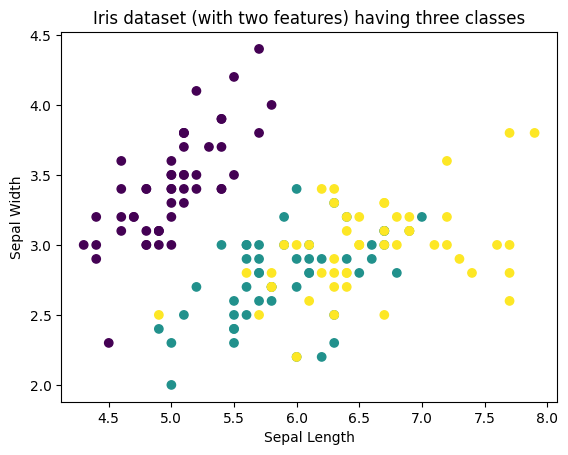

In [8]:
#displaying the dataset with its two features
xs,ys=xy[:]
fea1,fea2=0,1
plt.scatter(xs[:,fea1],xs[:,fea2],c=ys)
plt.title('Iris dataset (with two features) having three classes')
plt.xlabel(header[fea1]); plt.ylabel(header[fea2])
plt.show()

A custom dataset is inherited from the class **Dataset**, which must implement three magic methods init, len, and getitem. 
<br> The **init** method is run once at the begining and should be used for any necessary initialization.
<br> The **len** method returns the number of samples in the dataset. 
<br> The **getitem** method gets the index of the data in the dataset and then returns the tuple of feature and label of the given index.

In [9]:
#define our own custom dataset
class IrisDataset(Dataset):
    def __init__(self,csv_dataset,transform=None,target_transform=None):
        features,labels,_,_=iris_features_labels(csv_dataset)
        self.features,self.labels=torch.tensor(features),torch.tensor(labels)
        self.transform=transform
        self.target_transform=target_transform
    def __len__(self):
        return len(self.labels)
    def __getitem__(self,key):
        feature=self.features[key]
        label=self.labels[key]
        if self.transform:
            feature=self.transform(feature)
        if self.target_transform:
            label=self.target_transform(label)
        return feature,label         
# converting the iris dataset to (x,y) pairs of Dataset in PyTorch format
xy2=IrisDataset(iris)